In [10]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [11]:
data = pd.read_csv("winequality-red.csv")

In [12]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [14]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
X = data.drop('quality',axis=1) # feature (11 col)
y = data['quality']

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# apply PCA
pca = PCA(n_components=2) # reduce to 2 component
x_pca = pca.fit_transform(X_scaled)

In [18]:
print(f'variance = {pca.explained_variance_ratio_}')
print(f'total = {sum(pca.explained_variance_ratio_)}')

variance = [0.28173931 0.1750827 ]
total = 0.4568220118429403


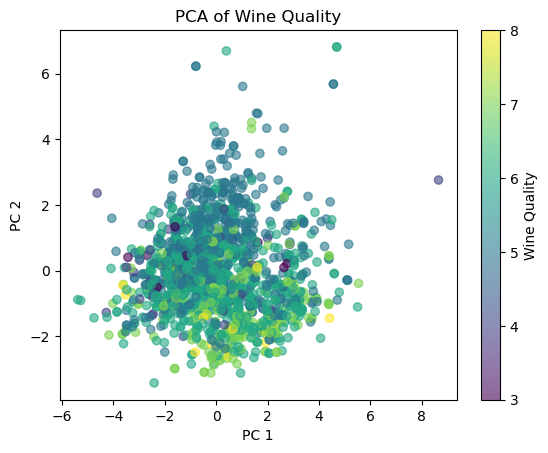

In [19]:
# visualize PCA Results
plt.Figure(figsize=(10,7))
scatter = plt.scatter(x_pca[:, 0],x_pca[:, 1], c = y , cmap='viridis',alpha=0.6)
plt.colorbar(scatter,label='Wine Quality')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA of Wine Quality')
plt.show()

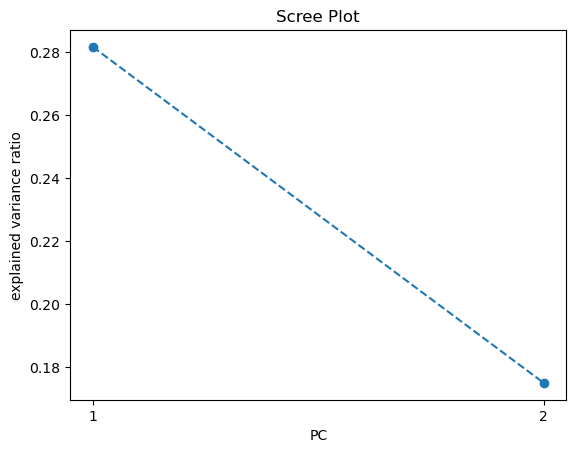

In [23]:
# scree plot variance per component
plt.Figure(figsize=(8,5))
plt.plot(range(1,3),pca.explained_variance_ratio_,marker='o',linestyle='--')
plt.xlabel('PC')
plt.ylabel('explained variance ratio')
plt.title('Scree Plot')
plt.xticks([1,2])
plt.show()

In [ ]:
# train a classifier on pca -transformed data
X_train , X_test , y_train , y_test = train_test_split(x_pca,y,test_size=0.2,random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Classifier accuracy with pca features = ',accuracy)

Classifier accuracy with pca features =  0.5375


In [26]:
# compare with original features 
X_train_orig , X_test_orig , y_train_orig , y_test_orig = train_test_split(X_scaled,y,test_size=0.2,random_state=42)
clf_orig = RandomForestClassifier(random_state=42)
clf_orig.fit(X_train_orig,y_train_orig)
y_pred_orig = clf_orig.predict(X_test_orig)
accuracy_orig = accuracy_score(y_test_orig,y_pred_orig)
print('Classifier accuracy with pca features = ',accuracy_orig)

Classifier accuracy with pca features =  0.65
